In [1]:
#!/usr/bin/python3

import matplotlib
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import os
import pandas as pd
import seaborn as sns
import warnings

from dt_clustering import Clustering
from dt_help import Helper
from dt_ml import MLPred
from dt_pdr import HistData
from pandas.plotting import register_matplotlib_converters

warnings.filterwarnings('ignore',category=FutureWarning)
pd.options.mode.chained_assignment = None 
register_matplotlib_converters()

if __name__ == '__main__':
    obj_helper = Helper('data_in','conf_help.yml')
    obj_helper.read_prm()
    
    fontsize = obj_helper.conf['font_size']
    matplotlib.rcParams['axes.labelsize'] = fontsize
    matplotlib.rcParams['xtick.labelsize'] = fontsize
    matplotlib.rcParams['ytick.labelsize'] = fontsize
    matplotlib.rcParams['legend.fontsize'] = fontsize
    matplotlib.rcParams['axes.titlesize'] = fontsize
    matplotlib.rcParams['text.color'] = 'k'

    data_obj = HistData('data_in','data_out','conf_pdr.yml')
    data_obj.read_prm()
    data_obj.process()
    
    df_train = data_obj.df_train
    
    float64_cols = df_train.select_dtypes(include='float64').columns
    mapper = {col_name: np.float32 for col_name in float64_cols}
    df_train = df_train.astype(mapper)
    

function:'read_prm' took: 0.00 sec
function:'get_data' took: 275.67 sec
function:'process' took: 275.67 sec


In [2]:
def missing_values_table(dff):
    res = round((dff.isnull().sum() * 100/ len(dff)),2).sort_values(ascending=False)
    df_res = pd.DataFrame()
    df_res['Variable'] = res.index
    df_res['Total number of samples'] = len(dff)
    df_res['Percentage of missing values'] = res.values
    df_res['Number of missing values'] = len(dff) * df_res['Percentage of missing values'] // 100.0
    df_res = df_res[df_res['Percentage of missing values'] > 0.0]
    return(df_res)

In [3]:
df_missing = missing_values_table(df_train)
df_missing

,Variable,Total number of samples,Percentage of missing values,Number of missing values
0,feature_27,2390491,16.55,395626.0
1,feature_17,2390491,16.55,395626.0
2,feature_18,2390491,16.55,395626.0
3,feature_28,2390491,16.55,395626.0
4,feature_8,2390491,16.45,393235.0
...,...,...,...,...
81,feature_45,2390491,0.02,478.0
82,feature_4,2390491,0.02,478.0
83,feature_3,2390491,0.02,478.0
84,feature_122,2390491,0.01,239.0


In [4]:
variables = df_missing['Variable'].to_list()
table_missing = df_missing.groupby('Number of missing values').agg({'Variable': lambda x: list(x)})
table_missing['Number features'] = table_missing['Variable'].apply(lambda x: len(x))
table_missing

,Variable,Number features
Number of missing values,,
239.0,"[feature_122, feature_123]",2
478.0,"[feature_44, feature_45, feature_4, feature_3]",4
717.0,"[feature_97, feature_109, feature_20, feature_...",15
1912.0,"[feature_129, feature_128]",2
6693.0,"[feature_15, feature_16, feature_25, feature_2...",14
8844.0,"[feature_126, feature_127]",2
15299.0,"[feature_87, feature_13, feature_75, feature_8...",14
16016.0,"[feature_125, feature_124]",2
64065.0,"[feature_110, feature_74, feature_98, feature_...",8


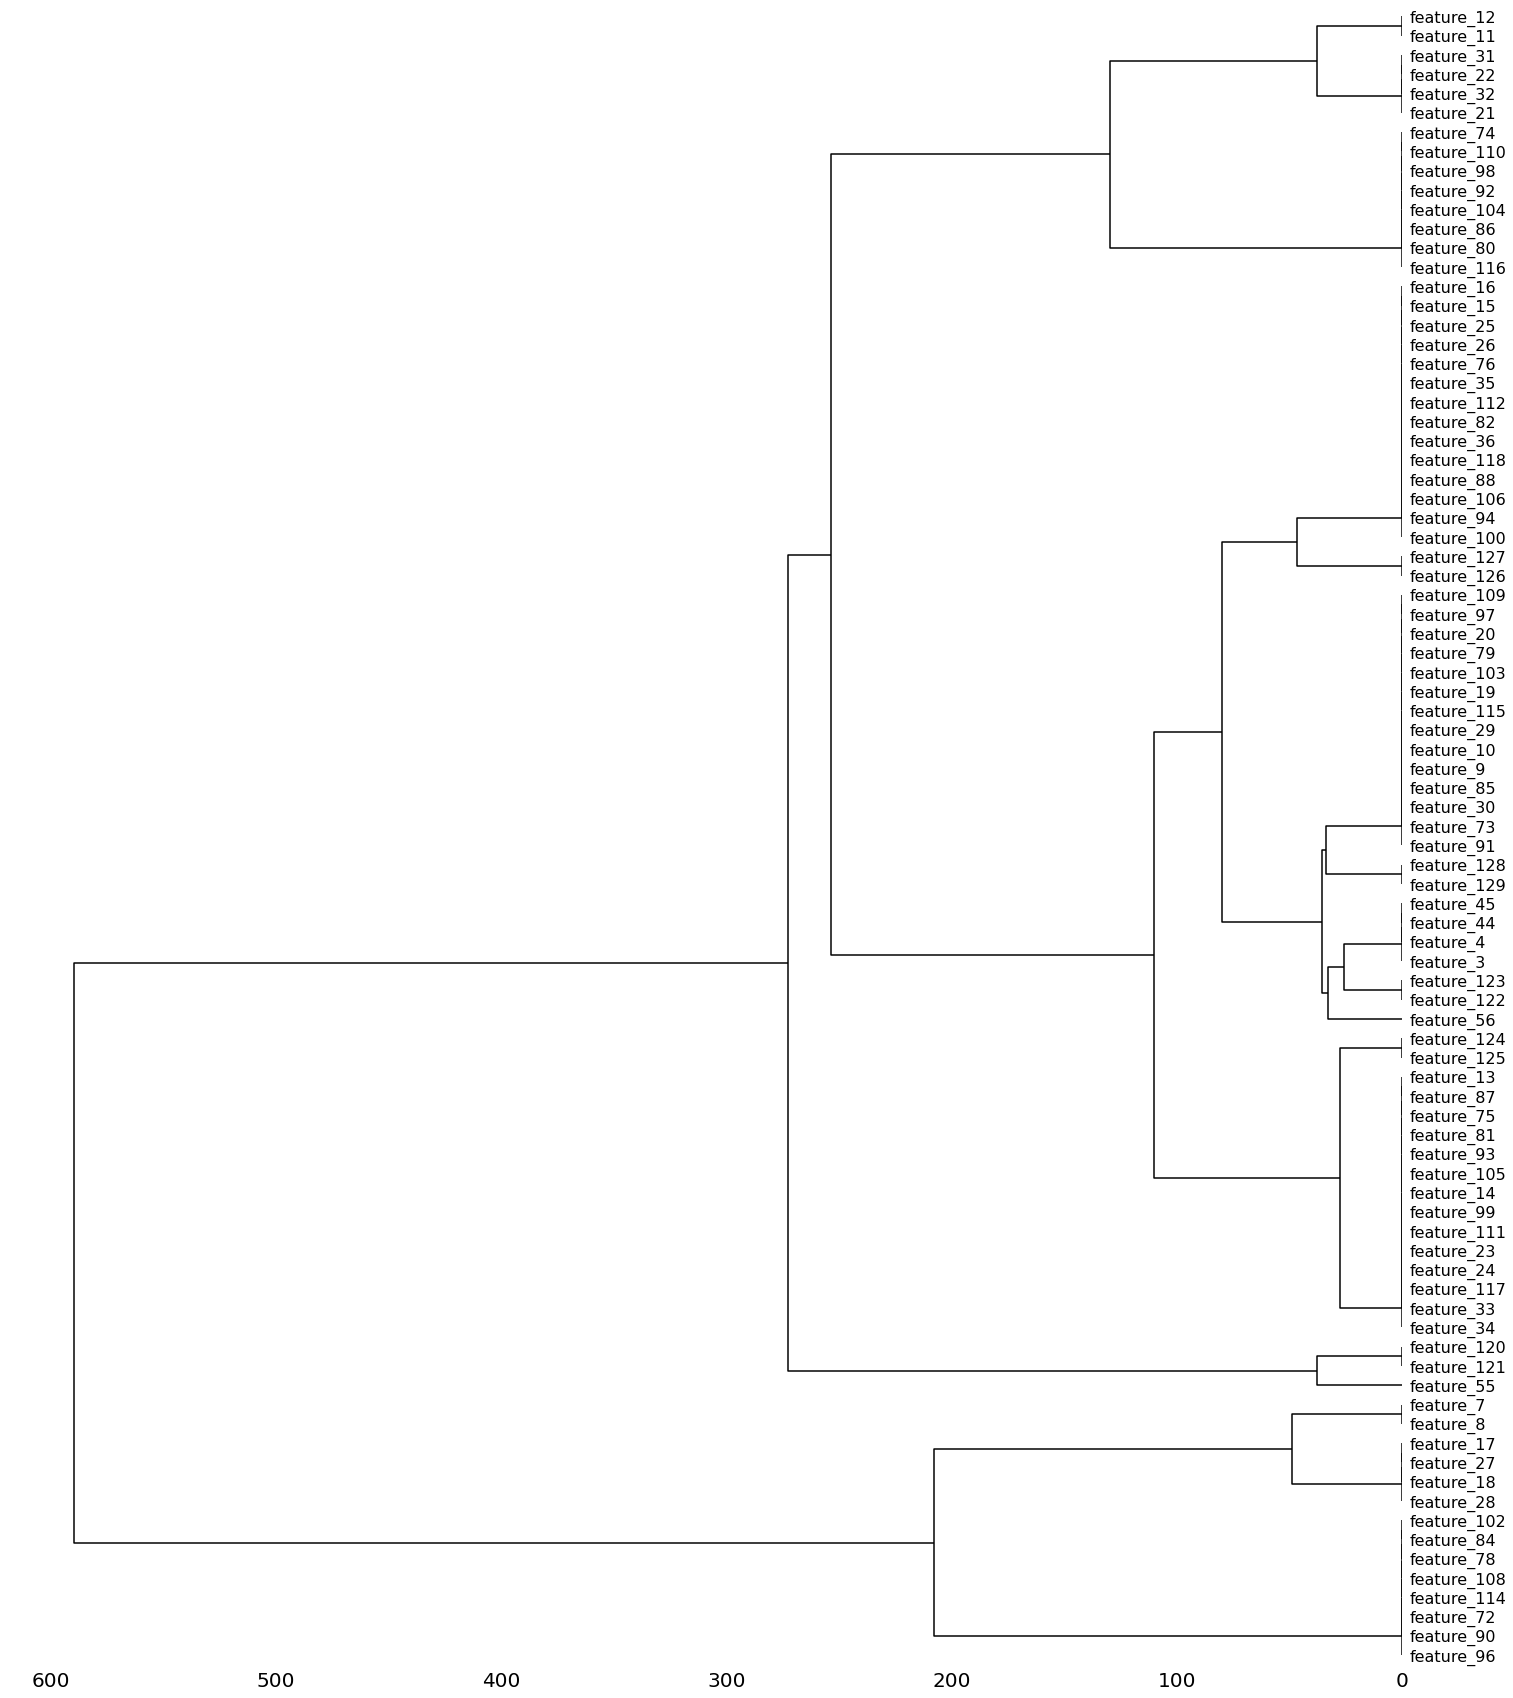

In [31]:
msno.dendrogram(df_train[variables])

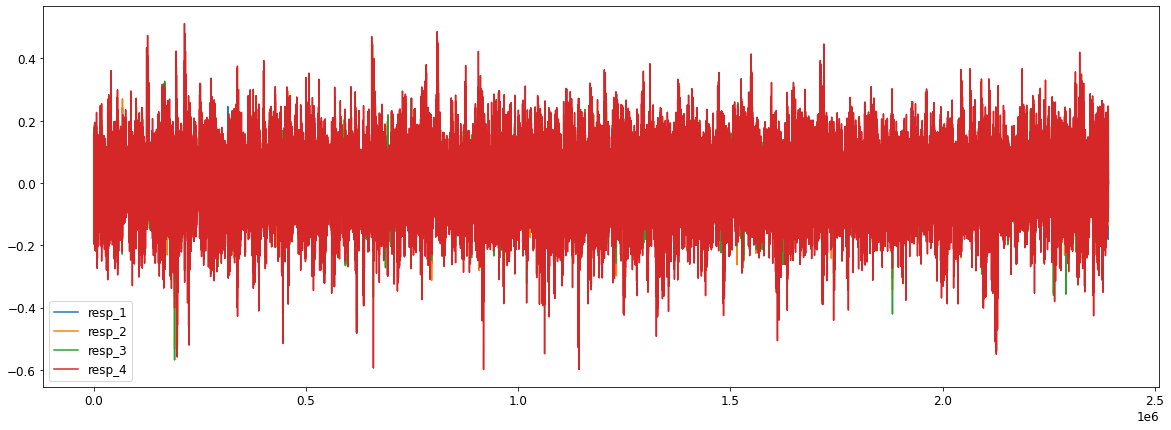

In [5]:
df_train[[el for el in df_train.columns if 'resp_' in el]].plot(figsize=(20,7));

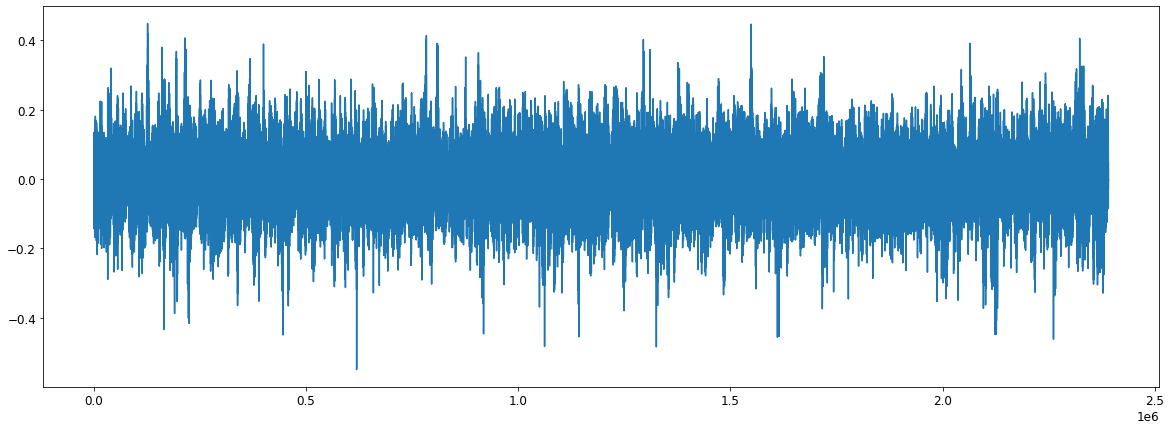

In [14]:
df_train['resp'].plot(figsize=(20,7));

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


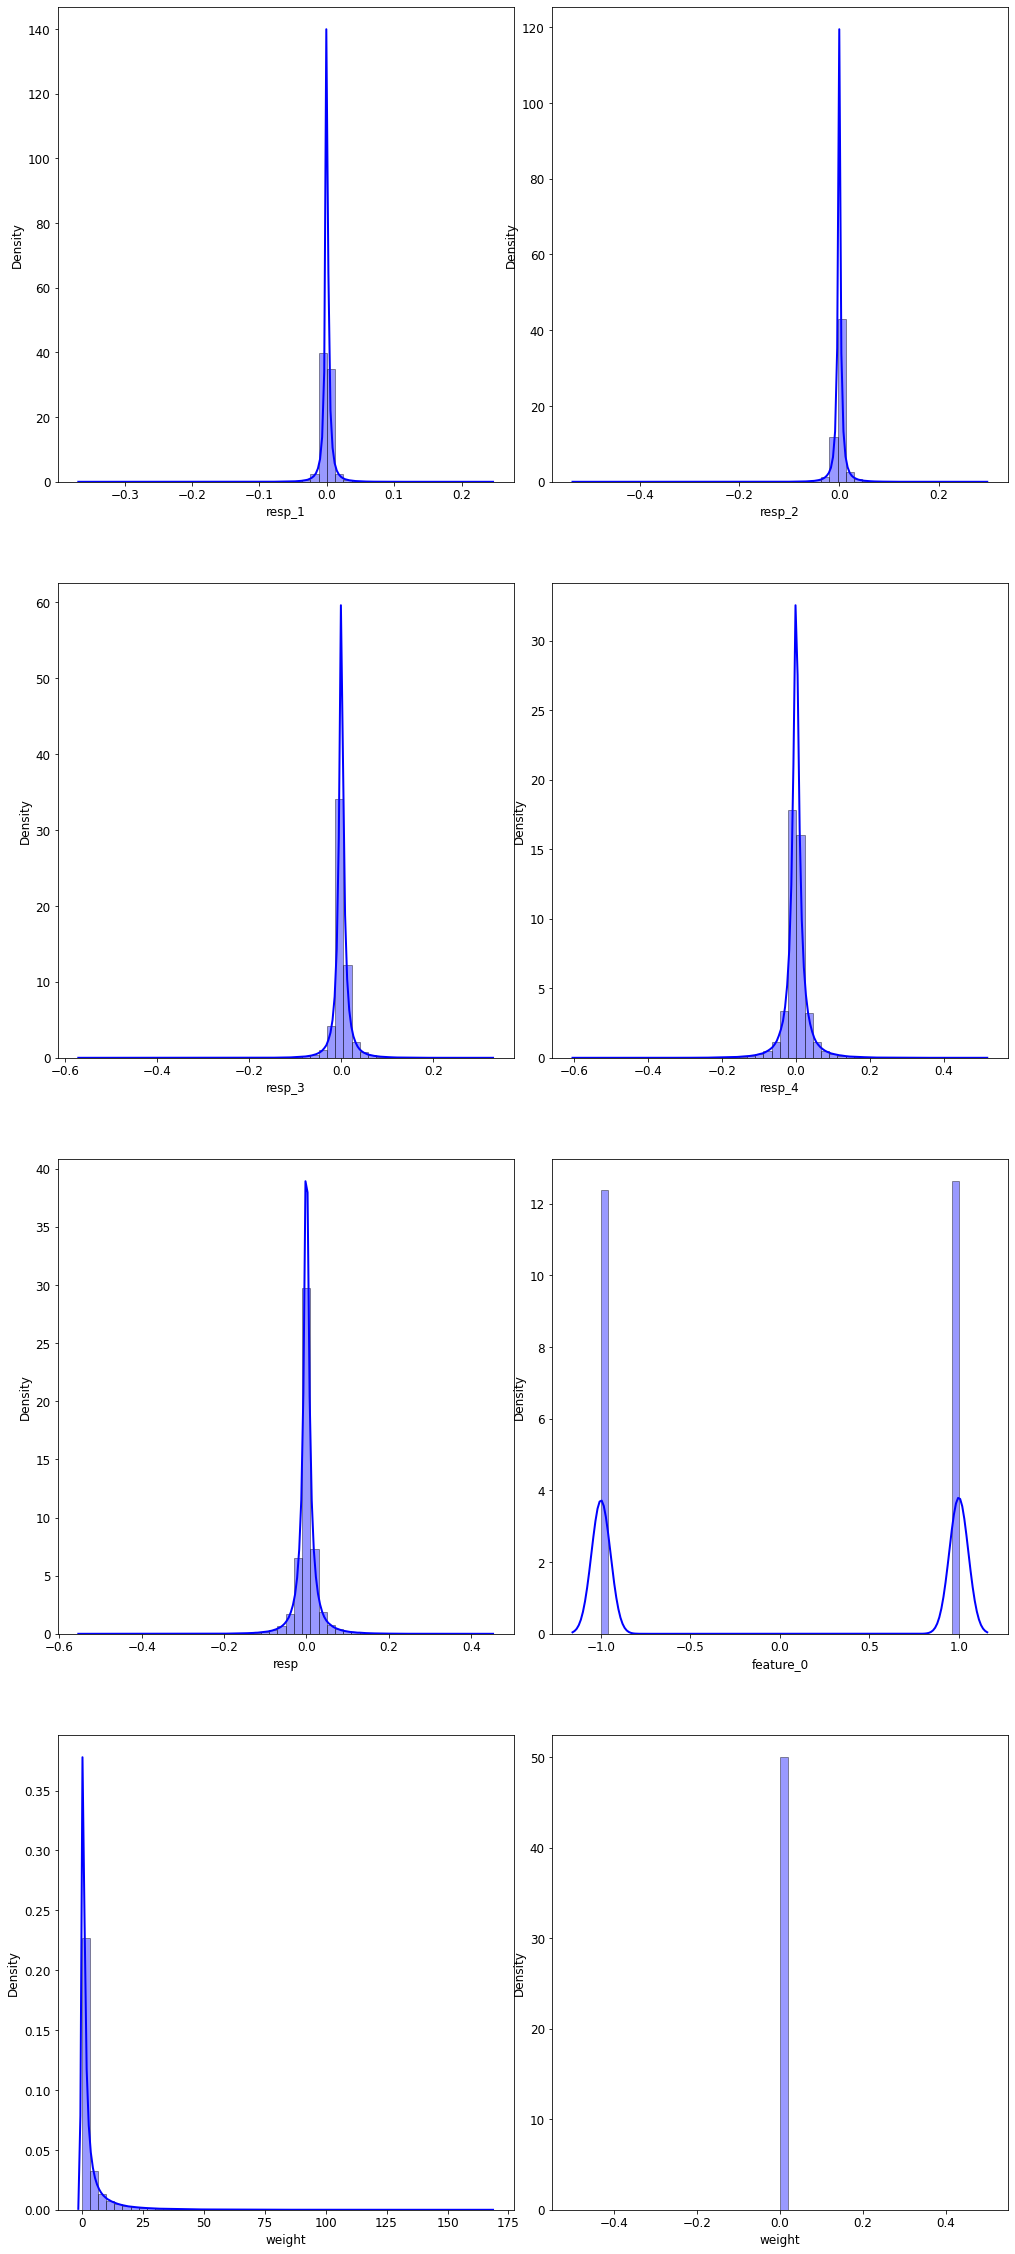

In [38]:
fig = plt.figure(figsize=(32,20))
font = {
        'family': 'serif',
        'color':  'darkblue',
        'weight': 'normal',
        'size': 16,
        }

size = 0.33
alignment = 0.1
ratio=0.6

ax_0 = fig.add_axes([alignment + 0.00 * size, 1.0, ratio*size, size])
ax_1 = fig.add_axes([alignment + 0.65 * size, 1.0, ratio*size, size])
ax_2 = fig.add_axes([alignment + 0.00 * size, 0.6, ratio*size, size])
ax_3 = fig.add_axes([alignment + 0.65 * size, 0.6, ratio*size, size])        
ax_4 = fig.add_axes([alignment + 0.00 * size, 0.2, ratio*size, size])
ax_5 = fig.add_axes([alignment + 0.65 * size, 0.2, ratio*size, size])        
ax_6 = fig.add_axes([alignment + 0.00 * size, -0.2, ratio*size, size])
ax_7 = fig.add_axes([alignment + 0.65 * size, -0.2, ratio*size, size])        

resps_str = ['resp_1','resp_2','resp_3','resp_4','resp','feature_0']
axs = [ax_0, ax_1, ax_2, ax_3, ax_4, ax_5] 
dct = dict(zip(resps_str,axs))

for k,v in dct.items():
    sns.distplot(df_train[k], hist=True, kde=True, color = 'blue', 
                 hist_kws={'edgecolor':'black'}, 
                 kde_kws={'linewidth': 2}, ax = v)      
sns.distplot(df_train[df_train['weight']>0]['weight'], hist=True, kde=True, color = 'blue', 
             hist_kws={'edgecolor':'black'}, 
             kde_kws={'linewidth': 2}, ax = ax_6)  
sns.distplot(df_train[df_train['weight']==0]['weight'], hist=True, kde=True, color = 'blue', 
             hist_kws={'edgecolor':'black'}, 
             kde_kws={'linewidth': 2}, ax = ax_7);  

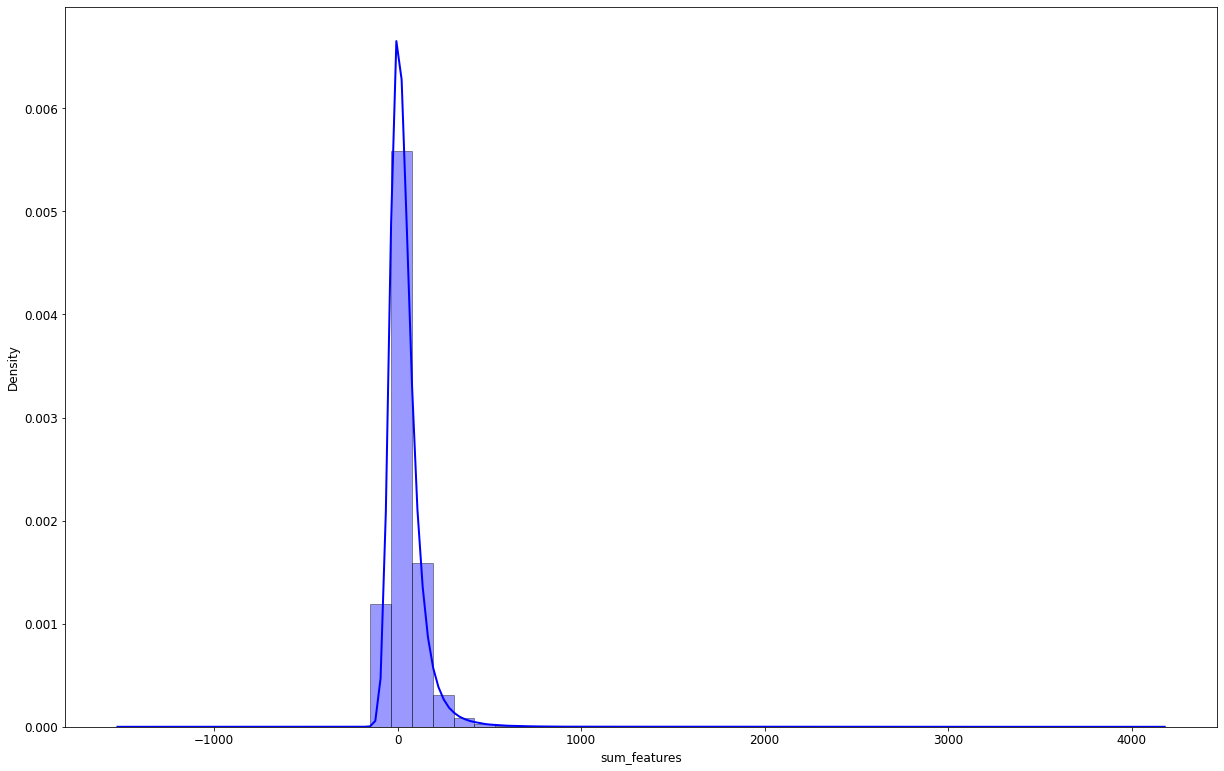

In [53]:
df_train['sum_features'] = df_train[[el for el in df_train.columns if 'feature_' in el]].sum(axis=1);

fig = plt.figure(figsize=(32,20))
font = {
        'family': 'serif',
        'color':  'darkblue',
        'weight': 'normal',
        'size': 16,
        }

size = 0.5
alignment = 0.1
ratio=1.0

ax_0 = fig.add_axes([alignment + 0.00 * size, 1.0, ratio*size, size])

sns.distplot(df_train['sum_features'], hist=True, kde=True, color = 'blue', 
             hist_kws={'edgecolor':'black'}, 
             kde_kws={'linewidth': 2});

df_train.drop(columns=['sum_features'],inplace=True);

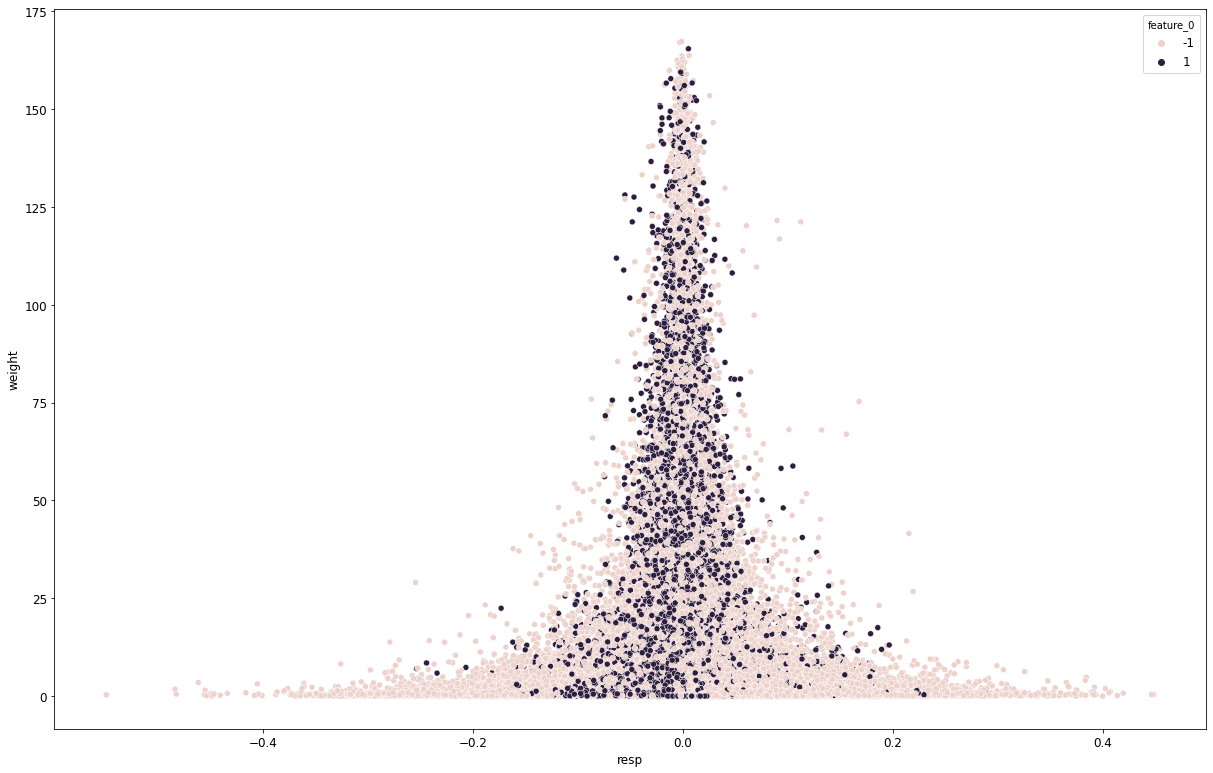

In [48]:
fig = plt.figure(figsize=(32,20))
font = {
        'family': 'serif',
        'color':  'darkblue',
        'weight': 'normal',
        'size': 16,
        }

size = 0.5
alignment = 0.1
ratio=1.0

ax = fig.add_axes([alignment + 0.00 * size, 1.0, ratio*size, size])

df_train['weight_resp'] = df_train['resp'] * df_train['weight'] 
sns.scatterplot(data=df_train, x='resp', y='weight', hue='feature_0', ax = ax);

# correlations = df_train[['weight_resp','feature_0']].corr(method='pearson')
# fig, axs = plt.subplots(figsize=(20,7))
# sns.heatmap(correlations,annot=True,fmt='f');

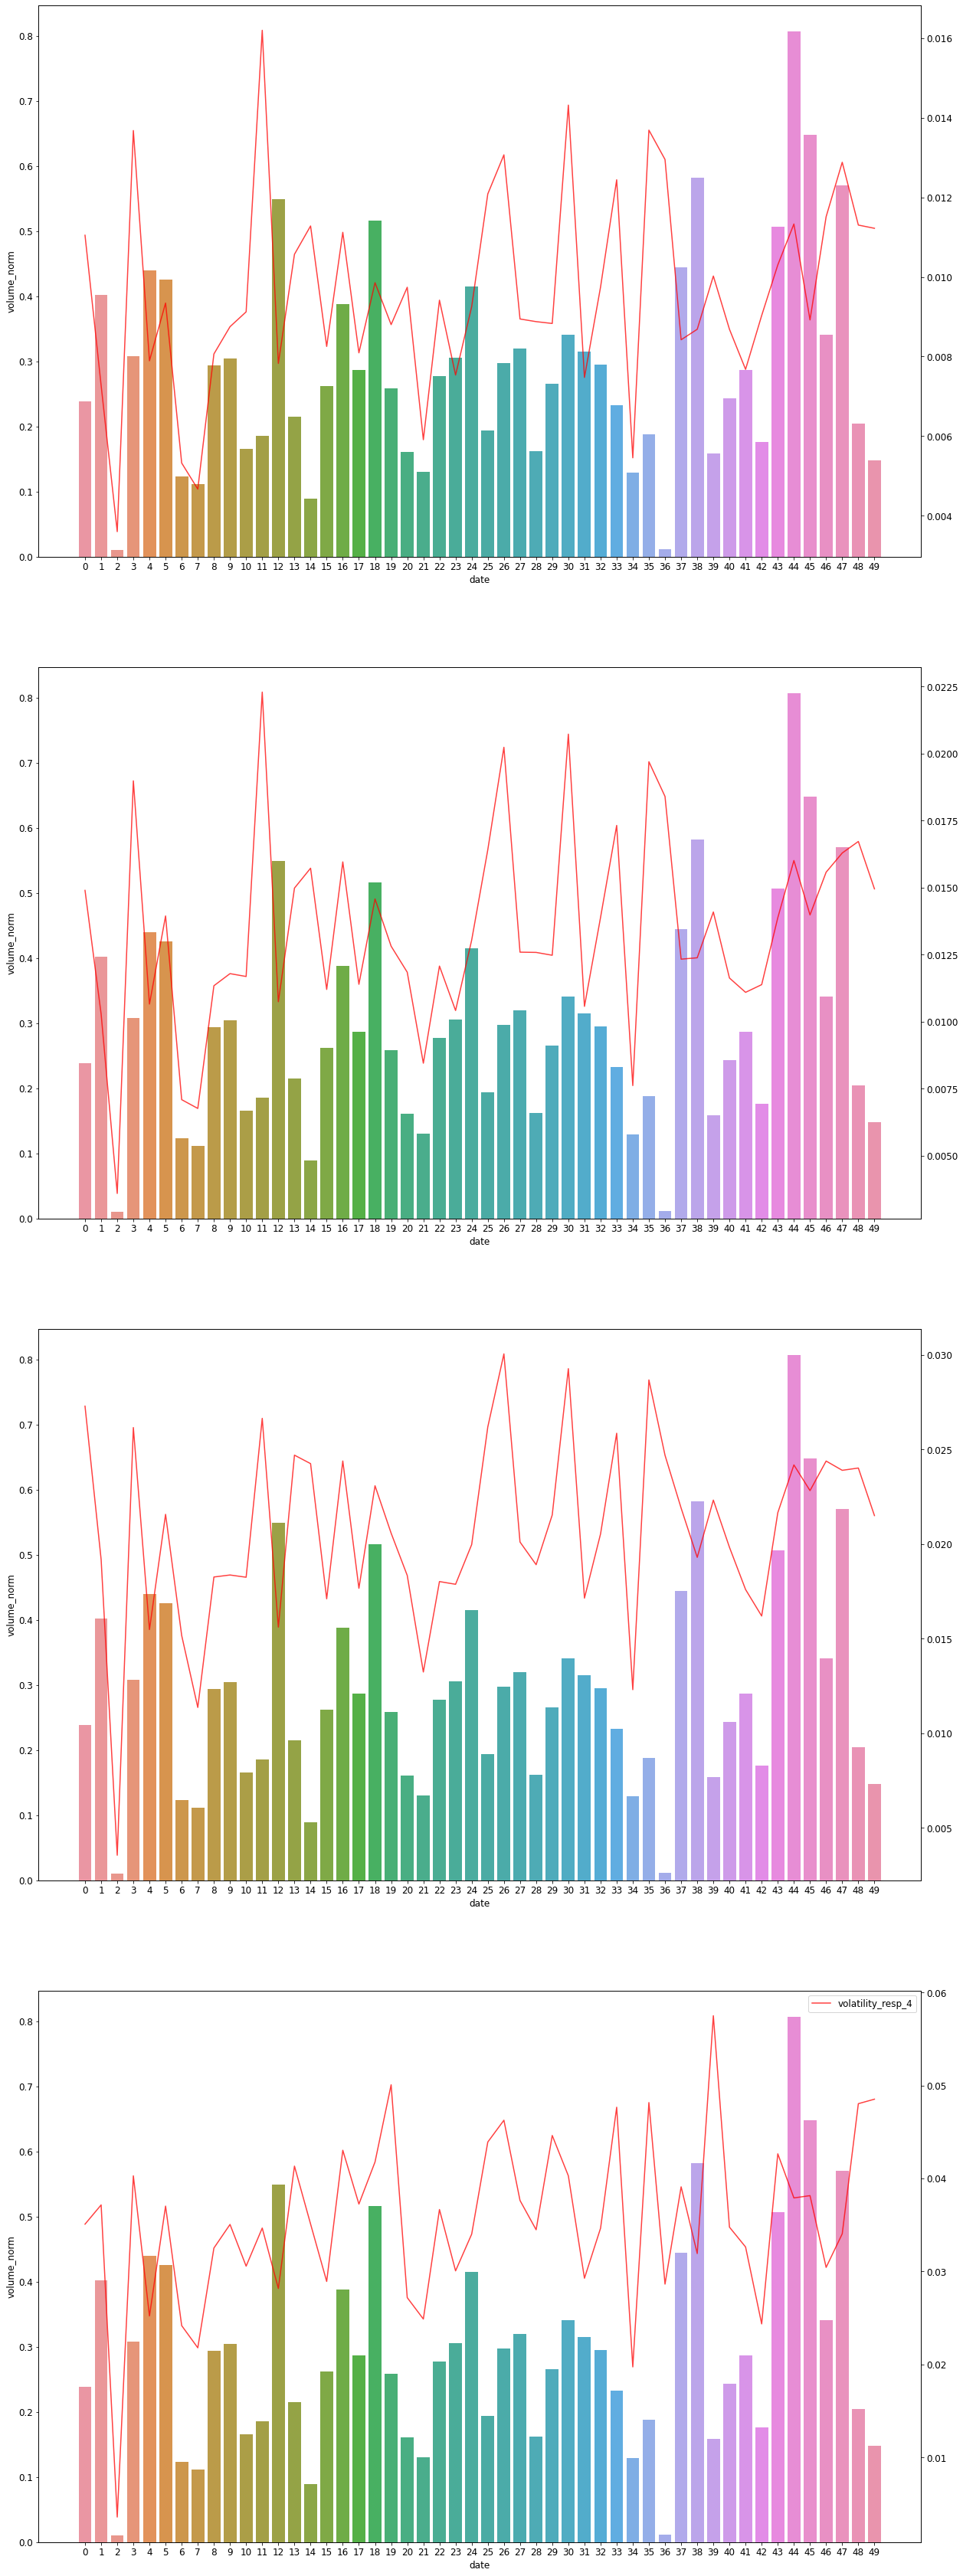

In [211]:
df_volume_vol = pd.DataFrame()
df_volume_vol['volume'] = df_train[['date']].value_counts()

# suppose we have a 6.5 hrs trading day <=> 6.5 * 3600 = 23500 seconds or potential action points
hrs = 6.5
cnv = 3600

df_volume_vol['volume_norm'] = df_volume_vol['volume'] / (hrs * cnv) # np.max(df_volume_vol['volume'])
df_volume_vol.sort_index(inplace=True)
df_volume_vol.reset_index(inplace=True)

resps_cols = ['resp','resp_1','resp_2','resp_3','resp_4']
volatility_cols = ['volatility_' + el for el in resps_cols]

df_volume_vol[volatility_cols] = df_train[['date']+resps_cols].groupby('date').std()
# df_volume_vol[volatility_cols] = df_volume_vol[volatility_cols] * np.sqrt(df_volume_vol['volume'])

fig = plt.figure(figsize=(32,20))
font = {
        'family': 'serif',
        'color':  'darkblue',
        'weight': 'normal',
        'size': 16,
        }

size = 0.5
alignment = 0.1
ratio=1.0

ax_1 = fig.add_axes([alignment + 0.00 * size, 1.0, ratio*size, size])
ax_11 = ax_1.twinx()

ax_2 = fig.add_axes([alignment + 0.00 * size, 0.4, ratio*size, size])
ax_22 = ax_2.twinx()

ax_3 = fig.add_axes([alignment + 0.00 * size, -0.2, ratio*size, size])
ax_33 = ax_3.twinx()

ax_4 = fig.add_axes([alignment + 0.00 * size, -0.8, ratio*size, size])
ax_44 = ax_4.twinx()


selected_vals = 50

sns.barplot(x = 'date',
            y = 'volume_norm',
            data = df_volume_vol[df_volume_vol.date < selected_vals],
            ax = ax_1);
ax_11.plot(ax_1.get_xticks(),df_volume_vol['volatility_resp_1'].values[:selected_vals],
          alpha = 0.75, color = 'r', label = 'volatility_resp_1');

sns.barplot(x = 'date',
            y = 'volume_norm',
            data = df_volume_vol[df_volume_vol.date < selected_vals],
            ax = ax_2);
ax_22.plot(ax_2.get_xticks(),df_volume_vol['volatility_resp_2'].values[:selected_vals],
          alpha = 0.75, color = 'r', label = 'volatility_resp_2');

sns.barplot(x = 'date',
            y = 'volume_norm',
            data = df_volume_vol[df_volume_vol.date < selected_vals],
            ax = ax_3);
ax_33.plot(ax_3.get_xticks(),df_volume_vol['volatility_resp_3'].values[:selected_vals],
          alpha = 0.75, color = 'r', label = 'volatility_resp_3');

sns.barplot(x = 'date',
            y = 'volume_norm',
            data = df_volume_vol[df_volume_vol.date < selected_vals],
            ax = ax_4);
ax_44.plot(ax_4.get_xticks(),df_volume_vol['volatility_resp_4'].values[:selected_vals],
          alpha = 0.75, color = 'r', label = 'volatility_resp_4');

plt.legend();

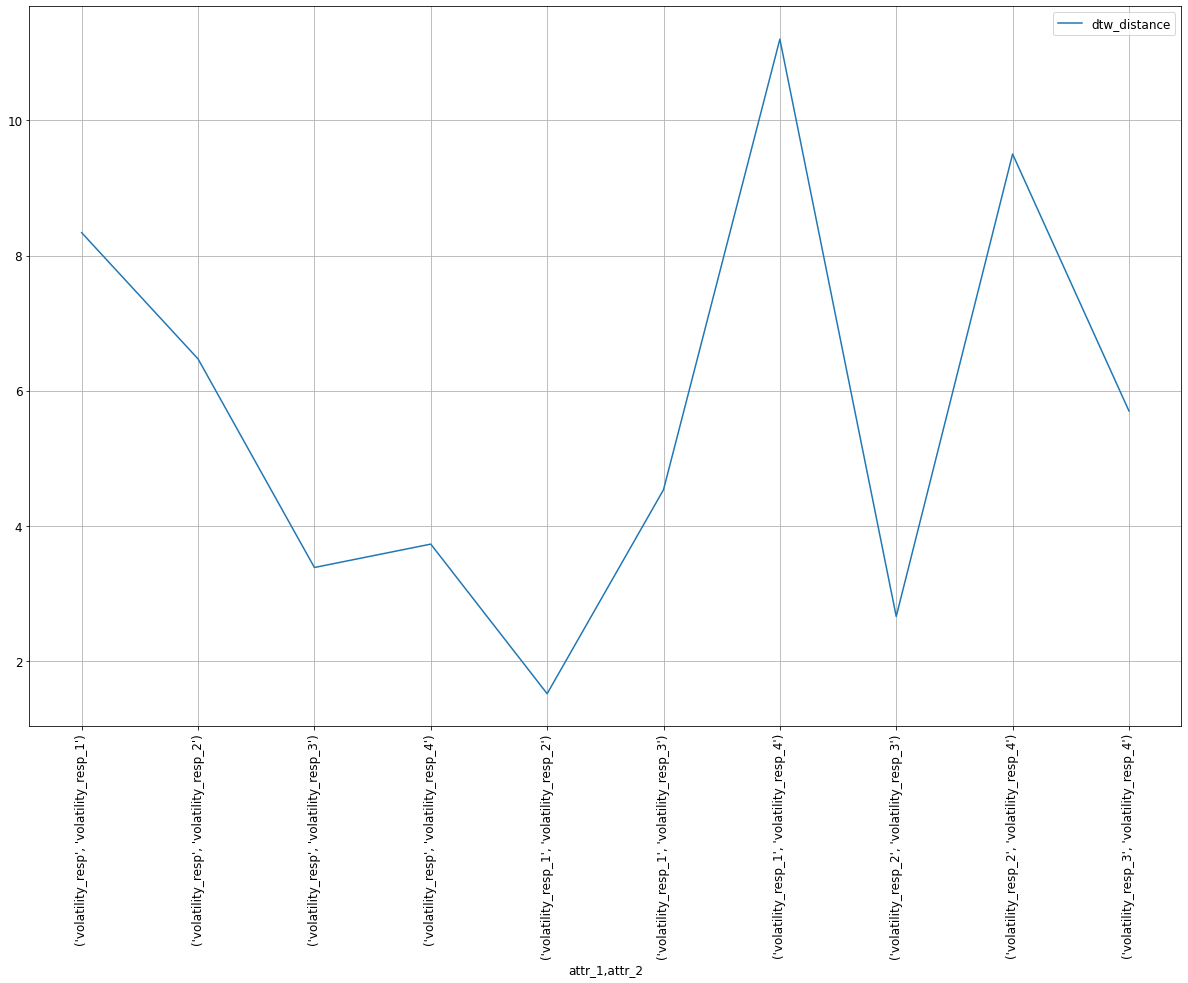

In [279]:
from fastdtw import fastdtw
from itertools import combinations
from scipy.spatial.distance import euclidean

def dtw_ts_fast(ts1,ts2):
    d, path = fastdtw(ts1,ts2,dist=euclidean)
    return(d)

volatility_str = list(combinations(['volatility_resp'] + ['volatility_resp_' + str(el) for el in range(1,5)],2))
dtws_volatility = [ dtw_ts_fast(df_volume_vol[el[0]],df_volume_vol[el[1]]) for el in volatility_str ]
midx = pd.MultiIndex.from_tuples(volatility_str,names=('attr_1', 'attr_2'))
df_dtws = pd.DataFrame(dtws_volatility,index=midx, columns=['dtw_distance'])

fig = plt.figure(figsize=(32,20))
font = {
        'family': 'serif',
        'color':  'darkblue',
        'weight': 'normal',
        'size': 16,
        }

size = 0.5
alignment = 0.1
ratio=1.0

ax = fig.add_axes([alignment + 0.00 * size, 1.0, ratio*size, size])
df_dtws.plot(ax=ax, grid=True)
ax.set_xticks(range(len(df_dtws)))
ax.set_xticklabels([ el for el in df_dtws.index.tolist()], rotation=90);

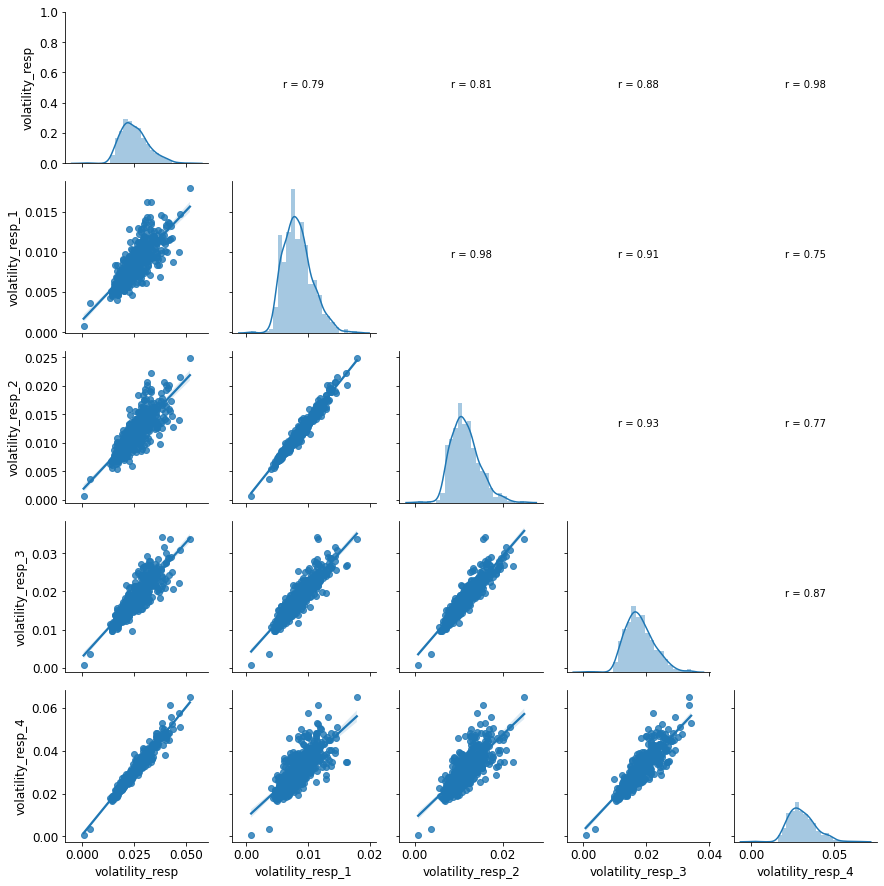

In [215]:
from scipy.stats import pearsonr
def reg_coef(x,y,label=None,color=None,**kwargs):
    ax = plt.gca()
    r,p = pearsonr(x,y)
    ax.annotate('r = {:.2f}'.format(r), xy=(0.5,0.5), xycoords='axes fraction', ha='center')
    ax.set_axis_off()

        
g = sns.PairGrid(df_volume_vol[[el for el in df_volume_vol.columns if 'volatility_' in el]])
g.map_diag(sns.distplot)
g.map_lower(sns.regplot)
g.map_upper(reg_coef)

# sns.lmplot('volume_norm', 'volatility', df_volume_vol, order=1, aspect=3.0);

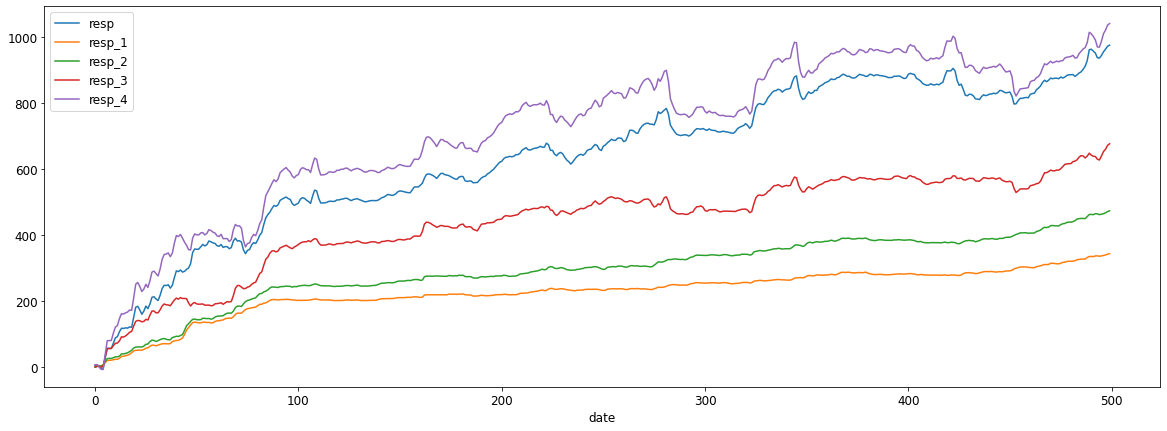

In [130]:
df_train[['resp','resp_1','resp_2','resp_3','resp_4']].cumsum().groupby('date').mean().plot(figsize=(20,7));

In [94]:
from scipy.spatial.distance import pdist, squareform

def rec_def(s, eps=0.1, steps=10):
    d = pdist(s[:,None])
    d = np.floor(d/eps)
    d[d>steps] = steps
    Z = squareform(d)
    return(Z)

def rec_plot(df,resps,ret_type):
    # not clear to me why people keep using 
    if(ret_type == 'cum_sum'):
        ss = [ df[el].cumsum().values for el in resps ]        
    elif(ret_type == 'cum_prod'):
        ss = [ (1.0+df[el]).cumprod().values for el in resps ]   
        
    a = [rec_def(s, eps=(max(s)-min(s))/len(s)) for s in ss ]

    size = 0.33
    alignment = 0.1
    ratio=0.6

    fig = plt.figure(figsize=(32,20))
    font = {
        'family': 'serif',
        'color':  'darkblue',
        'weight': 'normal',
        'size': 16,
        }

    ax_recurrence_0 = fig.add_axes([alignment + 0.00 * size, 0.66, ratio*size, size])
    ax_recurrence_1 = fig.add_axes([alignment + 0.65 * size, 0.66, ratio*size, size])
    ax_recurrence_2 = fig.add_axes([alignment + 0.00 * size, 0.33, ratio*size, size])
    ax_recurrence_3 = fig.add_axes([alignment + 0.65 * size, 0.33, ratio*size, size])        
    
    axs = [ax_recurrence_0, ax_recurrence_1, ax_recurrence_2, ax_recurrence_3]

    [ el.clear() for el in axs ]
    [ el.imshow(a[i],cmap='gray') for i,el in enumerate(axs) ]    
    [ el.title.set_text(resps[i].upper()) for i,el in enumerate(axs) ]

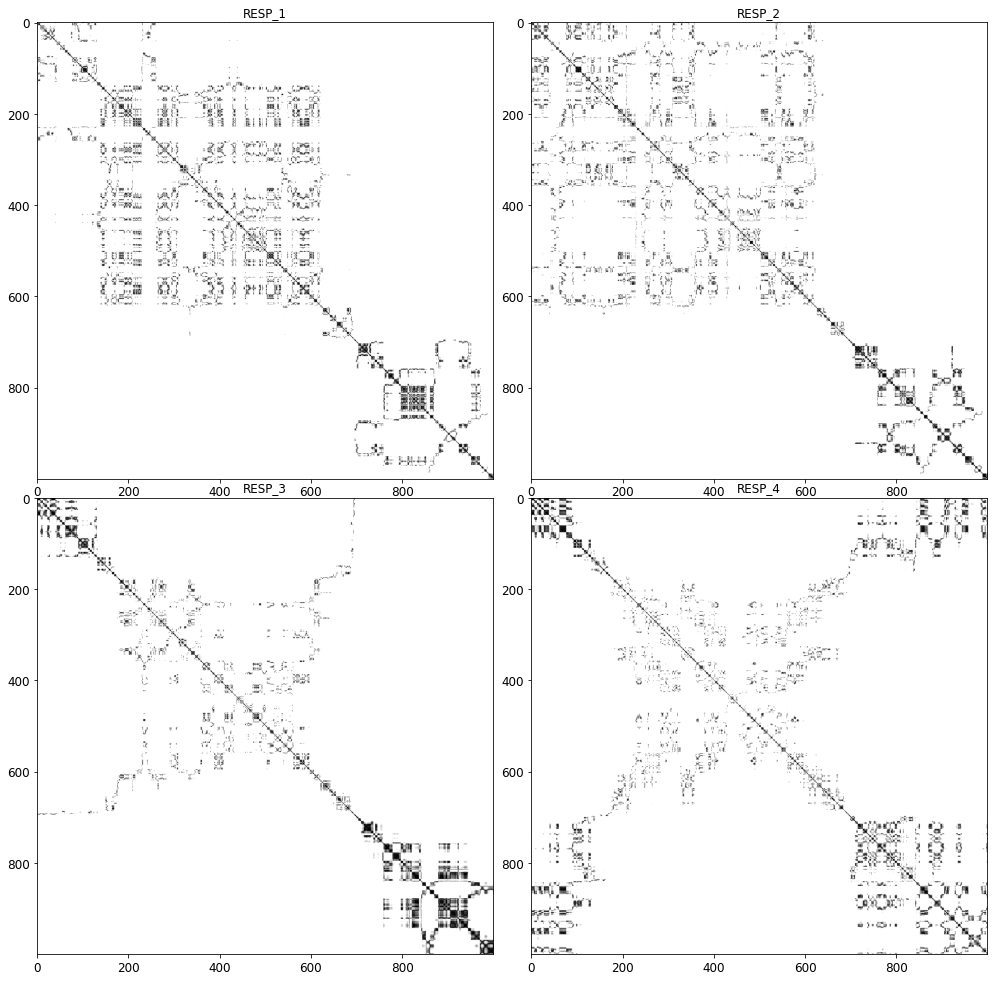

In [100]:
rec_plot(df_train.iloc[:1000],['resp_1','resp_2','resp_3','resp_4'],'cum_prod')

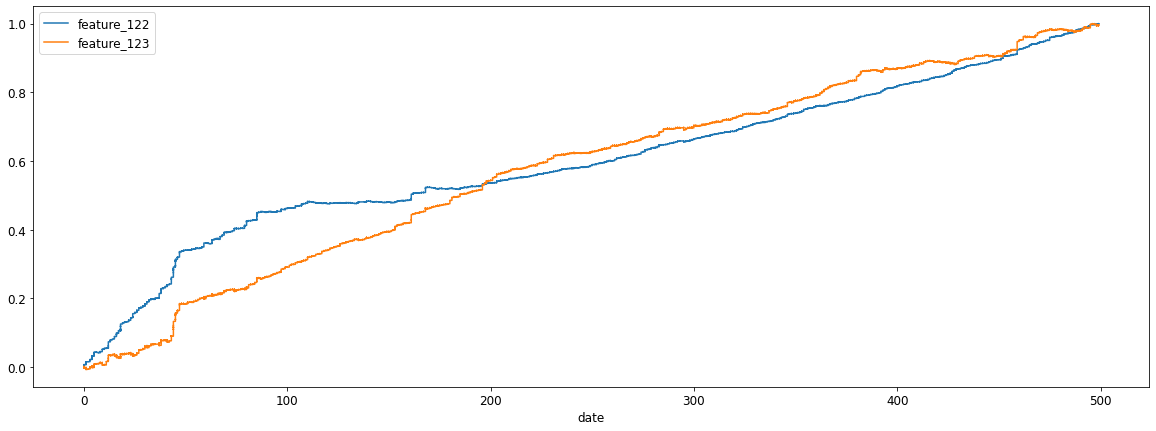

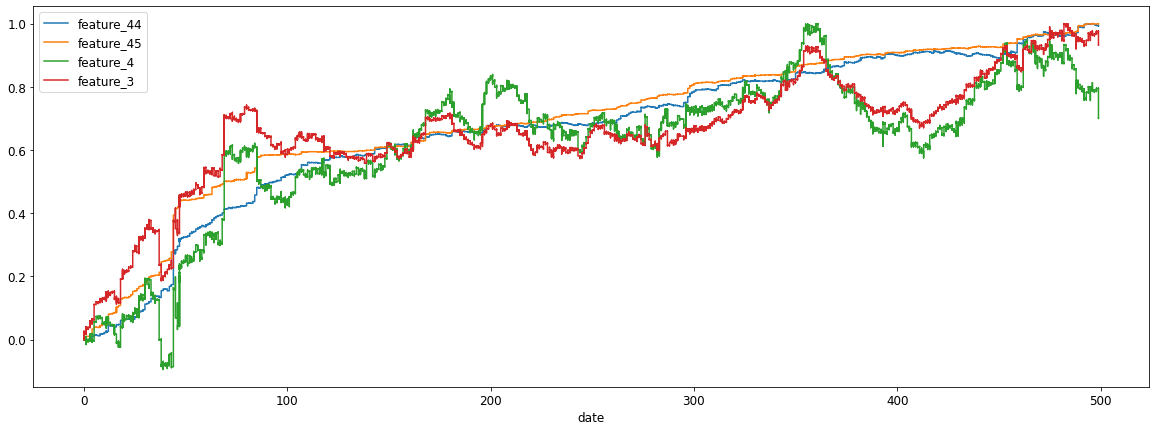

In [ ]:
# for el in table_missing['Variable']:
#     df_train[el].cumsum().apply(lambda x: x/max(x)).plot(figsize=(20,7))

In [ ]:
def num_plot(data, col, hist_bins = 10, figsize = (20,7)):    
    fig, axes = plt.subplots(1, 2, figsize = figsize)
    data = data.dropna();
    axes[0].boxplot(data, vert=False);
    sns.distplot(feature, hist=True, kde=True, 
                 color = 'blue',
                 hist_kws={'edgecolor':'black'},
                 kde_kws={'linewidth': 2}, ax = ax[1])                
        
    axes[0].set_yticklabels([])
    axes[0].set_yticks([])
    axes[0].set_title(col + " | Boxplot")
    axes[1].set_title(col + " | Density")
    plt.show()
    
for i in df_train.keys():
   print(i.upper())
   num_plot(df_train[i], str(i.upper()), hist_bins = 10, figsize = (20,4))
   print("\n\n")    